In [ ]:
#  Week 1 – EV Range Prediction Project
# Goal: Predict the driving range (km) of an electric vehicle based on battery capacity, efficiency, and other specifications.  
# Dataset:Electric Vehicle Dataset 2024 (vanillatyy1 – Kaggle)  
# Files: cars_data_RAW.csv and cars_data_cleaned.csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")


In [3]:
# load from data/raw folder
df = pd.read_csv("C:\EV-Project\data\cars_data_RAW.csv")
print("Shape of data:", df.shape)
df.head()


Shape of data: (353, 17)


,Row_ID,title,model,battery,price-range,0 - 100,Top Speed,Range*,Efficiency*,Fastcharge*,Germany_price_before_incentives,Netherlands_price_before_incentives,UK_price_after_incentives,Drive_Configuration,Tow_Hitch,Towing_capacity_in_kg,Number_of_seats
0,1,Tesla,Model 3,57.5,104,6.1 sec,201 km/h,415 km,139 Wh/km,690 km/h,"€41,970","€41,990","£39,990",Rear Wheel Drive,Towbar possible,1000.0,5
1,2,Tesla,Model Y,57.5,137,6.9 sec,217 km/h,350 km,164 Wh/km,580 km/h,"€45,970","€45,990","£44,990",Rear Wheel Drive,Towbar possible,1600.0,5
2,3,Tesla,Model Y Long Range Dual Motor,75.0,130,5.0 sec,217 km/h,435 km,172 Wh/km,670 km/h,"€55,970","€52,990","£52,990",All Wheel Drive,Towbar possible,1600.0,5
3,4,Tesla,Model 3 Long Range Dual Motor,75.0,106,4.4 sec,201 km/h,500 km,150 Wh/km,770 km/h,"€50,970","€49,990","£49,990",All Wheel Drive,Towbar possible,1000.0,5
4,5,Tesla,Model Y Long Range RWD,75.0,109,5.9 sec,217 km/h,460 km,163 Wh/km,710 km/h,"€49,970","€49,990",NaN,Rear Wheel Drive,Towbar possible,1600.0,5


In [4]:
df.info()
df.describe(include='all')
df.isnull().sum().sort_values(ascending=False).head(15)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353 entries, 0 to 352
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Row_ID                               353 non-null    int64  
 1   title                                353 non-null    object 
 2   model                                353 non-null    object 
 3   battery                              353 non-null    float64
 4   price-range                          353 non-null    int64  
 5   0 - 100                              353 non-null    object 
 6   Top Speed                            353 non-null    object 
 7   Range*                               353 non-null    object 
 8   Efficiency*                          353 non-null    object 
 9   Fastcharge*                          353 non-null    object 
 10  Germany_price_before_incentives      340 non-null    object 
 11  Netherlands_price_before_incenti

Towing_capacity_in_kg                  125
Tow_Hitch                              116
UK_price_after_incentives              106
Netherlands_price_before_incentives     31
Germany_price_before_incentives         13
Row_ID                                   0
title                                    0
battery                                  0
model                                    0
Efficiency*                              0
Range*                                   0
Top Speed                                0
0 - 100                                  0
price-range                              0
Fastcharge*                              0
dtype: int64

In [6]:
print(df_clean.columns.tolist())


['Row_ID', 'title', 'model', 'battery', 'price-range', '0 - 100', 'Top Speed', 'Range*', 'Efficiency*', 'Fastcharge*', 'Germany_price_before_incentives', 'Netherlands_price_before_incentives', 'UK_price_after_incentives', 'Drive_Configuration', 'Tow_Hitch', 'Towing_capacity_in_kg', 'Number_of_seats']


In [16]:
# Make a copy of original dataframe
df_clean = df.copy()

# Drop duplicates
df_clean = df_clean.drop_duplicates()

# --- Handle missing numeric values (fill with median) ---
num_cols = df_clean.select_dtypes(include=['float', 'int']).columns
for col in num_cols:
    df_clean[col] = df_clean[col].fillna(df_clean[col].median())

# --- Handle missing categorical values (fill with mode) ---
cat_cols = df_clean.select_dtypes(include=['object']).columns
for col in cat_cols:
    df_clean[col] = df_clean[col].fillna(df_clean[col].mode()[0])

# --- Convert specific columns to numeric ---
# Use lower-case names if you already normalized column names earlier.
df_clean.rename(columns={
    'efficiency*': 'efficiency',
    'range*': 'range'
}, inplace=True)

df_clean['battery'] = pd.to_numeric(df_clean['battery'], errors='coerce')
df_clean['Efficiency*'] = pd.to_numeric(df_clean['Efficiency*'], errors='coerce')
df_clean['Range*'] = pd.to_numeric(df_clean['Range*'], errors='coerce')

print("✅ Data cleaned successfully!")
df_clean.info()


✅ Data cleaned successfully!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353 entries, 0 to 352
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Row_ID                               353 non-null    int64  
 1   title                                353 non-null    object 
 2   model                                353 non-null    object 
 3   battery                              353 non-null    float64
 4   price-range                          353 non-null    int64  
 5   0 - 100                              353 non-null    object 
 6   Top Speed                            353 non-null    object 
 7   Range*                               0 non-null      float64
 8   Efficiency*                          0 non-null      float64
 9   Fastcharge*                          353 non-null    object 
 10  Germany_price_before_incentives      353 non-null    object 
 11  Net

In [23]:
# Normalize and clean column names
df_clean.columns = (
    df_clean.columns
    .str.strip()
    .str.lower()
    .str.replace(' ', '_')
    .str.replace('-', '_')
    .str.replace('*', '')
)

# Manually rename specific tricky column(s)
rename_map = {
    '0_100': 'zero_to_hundred',     # Fix acceleration column
    '0___100': 'zero_to_hundred',   # Just in case it had multiple underscores
}
df_clean.rename(columns=rename_map, inplace=True)

print("✅ Columns after final renaming:")
print(df_clean.columns.tolist())



✅ Columns after final renaming:
['row_id', 'title', 'model', 'battery', 'price_range', 'zero_to_hundred', 'top_speed', 'range', 'efficiency', 'fastcharge', 'germany_price_before_incentives', 'netherlands_price_before_incentives', 'uk_price_after_incentives', 'drive_configuration', 'tow_hitch', 'towing_capacity_in_kg', 'number_of_seats']


In [24]:
# Convert numeric-like text columns to proper numeric values
df_clean['battery'] = pd.to_numeric(df_clean['battery'], errors='coerce')

# Convert 'top_speed' → remove " km/h"
if 'top_speed' in df_clean.columns:
    df_clean['top_speed'] = pd.to_numeric(df_clean['top_speed'].astype(str).str.replace(' km/h', ''), errors='coerce')

# Convert acceleration time (zero_to_hundred) → remove " sec"
if 'zero_to_hundred' in df_clean.columns:
    df_clean['zero_to_hundred'] = pd.to_numeric(df_clean['zero_to_hundred'].astype(str).str.replace(' sec', ''), errors='coerce')

# Convert towing capacity and price range
df_clean['towing_capacity_in_kg'] = pd.to_numeric(df_clean['towing_capacity_in_kg'], errors='coerce')
df_clean['price_range'] = pd.to_numeric(df_clean['price_range'], errors='coerce')

print("✅ Numeric conversion completed!")
df_clean[['battery', 'top_speed', 'zero_to_hundred', 'towing_capacity_in_kg', 'price_range']].head()


✅ Numeric conversion completed!


,battery,top_speed,zero_to_hundred,towing_capacity_in_kg,price_range
0,57.5,201,6.1,1000.0,104
1,57.5,217,6.9,1600.0,137
2,75.0,217,5.0,1600.0,130
3,75.0,201,4.4,1000.0,106
4,75.0,217,5.9,1600.0,109


In [25]:
print("🔍 Missing values per column:")
print(df_clean.isnull().sum())
print("\nData types after conversion:")
print(df_clean.dtypes)


🔍 Missing values per column:
row_id                                   0
title                                    0
model                                    0
battery                                  0
price_range                              0
zero_to_hundred                          0
top_speed                                0
range                                  353
efficiency                             353
fastcharge                               0
germany_price_before_incentives          0
netherlands_price_before_incentives      0
uk_price_after_incentives                0
drive_configuration                      0
tow_hitch                                0
towing_capacity_in_kg                    0
number_of_seats                          0
dtype: int64

Data types after conversion:
row_id                                   int64
title                                   object
model                                   object
battery                                float64
price_ran

In [26]:
df_clean = df_clean.drop(columns=['range', 'efficiency'])
print("✅ Dropped empty columns ('range', 'efficiency')")


✅ Dropped empty columns ('range', 'efficiency')


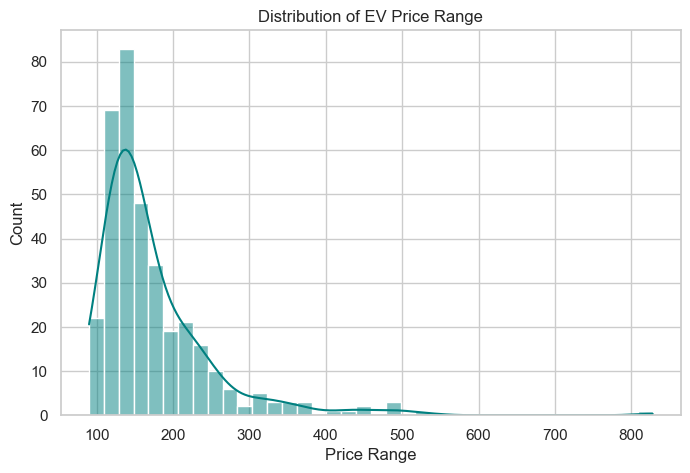

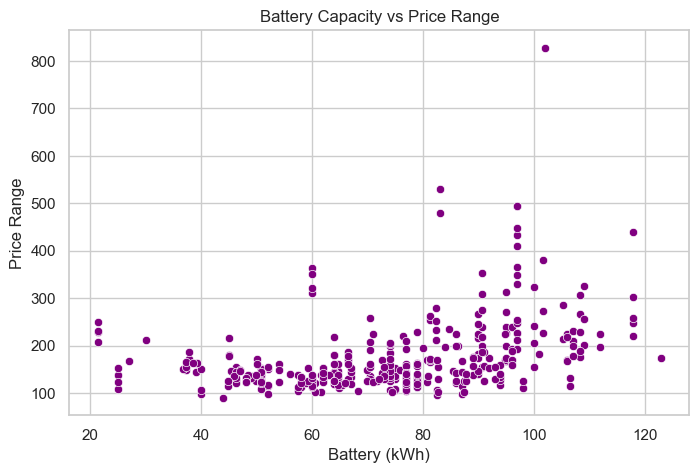

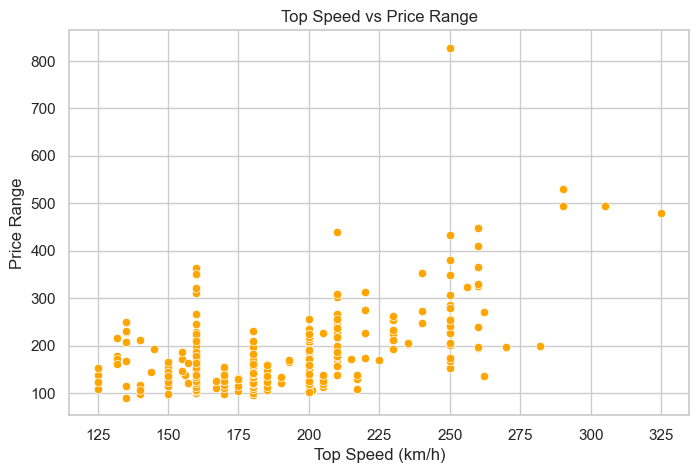

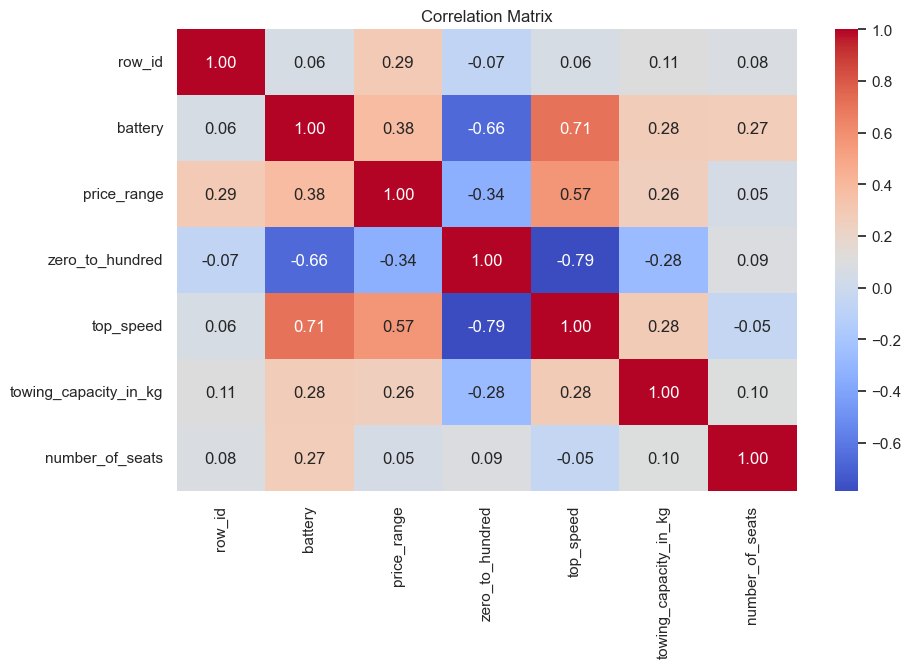

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

# 1. Distribution of price range
plt.figure(figsize=(8,5))
sns.histplot(df_clean['price_range'], kde=True, color='teal')
plt.title("Distribution of EV Price Range")
plt.xlabel("Price Range")
plt.show()

# 2. Battery vs Price Range
plt.figure(figsize=(8,5))
sns.scatterplot(x='battery', y='price_range', data=df_clean, color='purple')
plt.title("Battery Capacity vs Price Range")
plt.xlabel("Battery (kWh)")
plt.ylabel("Price Range")
plt.show()

# 3. Top Speed vs Price Range
plt.figure(figsize=(8,5))
sns.scatterplot(x='top_speed', y='price_range', data=df_clean, color='orange')
plt.title("Top Speed vs Price Range")
plt.xlabel("Top Speed (km/h)")
plt.ylabel("Price Range")
plt.show()

# 4. Correlation heatmap for numeric columns
plt.figure(figsize=(10,6))
sns.heatmap(df_clean.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


In [28]:
# Select features and target
features = ['battery', 'top_speed', 'zero_to_hundred', 'towing_capacity_in_kg', 'number_of_seats']
X = df_clean[features]
y = df_clean['price_range']

# Drop missing values
X = X.dropna()
y = y.loc[X.index]

print("✅ Features and target prepared!")
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


✅ Features and target prepared!
Shape of X: (353, 5)
Shape of y: (353,)


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# Split dataset into train & test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test data
pred = model.predict(X_test)

# Evaluate model performance
print("✅ Model Trained Successfully!\n")
print("R² Score:", round(r2_score(y_test, pred), 3))
print("Mean Absolute Error (MAE):", round(mean_absolute_error(y_test, pred), 2))


✅ Model Trained Successfully!

R² Score: 0.263
Mean Absolute Error (MAE): 48.18


In [30]:
df_clean.to_csv("../data/cars_data_cleaned.csv", index=False)
print("✅ Cleaned dataset saved to '../data/cars_data_cleaned.csv'")


✅ Cleaned dataset saved to '../data/cars_data_cleaned.csv'


In [31]:
## ✅ Week 1 Summary
# - Cleaned dataset and standardized column names  
# - Converted key columns (`battery`, `top_speed`, `zero_to_hundred`, `price_range`) to numeric  
# - Visualized important relationships between features and price  
# - Built a simple **Linear Regression** model to predict EV price range  
# - Saved cleaned dataset for Week 2 advanced modeling  
